In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [9]:
df=pd.read_csv('/content/Engagement_Case.csv')

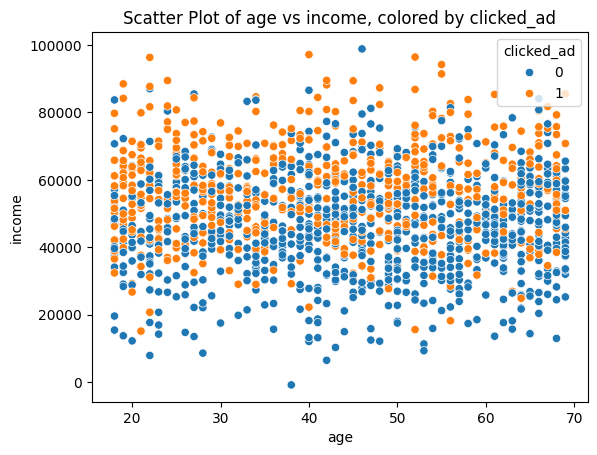

In [10]:

sns.scatterplot(x='age', y='income', hue='clicked_ad', data=df)
plt.title('Scatter Plot of age vs income, colored by clicked_ad')
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [11]:
# Import necessary libraries (if not already imported)
import pandas as pd

# List of categorical columns to one-hot encode
categorical_cols = ['marketing_channel', 'region','gender', 'product_type']

# Perform one-hot encoding
df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the updated DataFrame
print(df_enc.head())

   age  income  previous_purchases  clicked_ad  marketing_channel_1  \
0   56   59261                   2           0                False   
1   69   31997                   3           0                False   
2   46   34333                   3           0                False   
3   32   46664                   4           0                False   
4   60   54460                   2           0                False   

   marketing_channel_2  marketing_channel_3  region_1  region_2  region_3  \
0                 True                False     False     False     False   
1                 True                False     False     False     False   
2                False                False     False     False      True   
3                False                 True     False      True     False   
4                 True                False     False     False     False   

   gender_1  product_type_1  product_type_2  
0     False           False            True  
1     False       

In [12]:
# Define features and target variable
X = df_enc.drop('clicked_ad', axis=1)
y = df_enc['clicked_ad']

In [13]:
# Split the dataset into training and testing sets with 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [14]:
# Assuming df_enc is your DataFrame after one-hot encoding

# Find boolean columns
boolean_cols = [col for col in df_enc.columns if pd.api.types.is_bool_dtype(df_enc[col])]

# Convert boolean columns to 0s and 1s
for col in boolean_cols:
    df_enc[col] = df_enc[col].astype(int)

# Display the first few rows of the updated DataFrame
print(df_enc.head())

   age  income  previous_purchases  clicked_ad  marketing_channel_1  \
0   56   59261                   2           0                    0   
1   69   31997                   3           0                    0   
2   46   34333                   3           0                    0   
3   32   46664                   4           0                    0   
4   60   54460                   2           0                    0   

   marketing_channel_2  marketing_channel_3  region_1  region_2  region_3  \
0                    1                    0         0         0         0   
1                    1                    0         0         0         0   
2                    0                    0         0         0         1   
3                    0                    1         0         1         0   
4                    1                    0         0         0         0   

   gender_1  product_type_1  product_type_2  
0         0               0               1  
1         0       

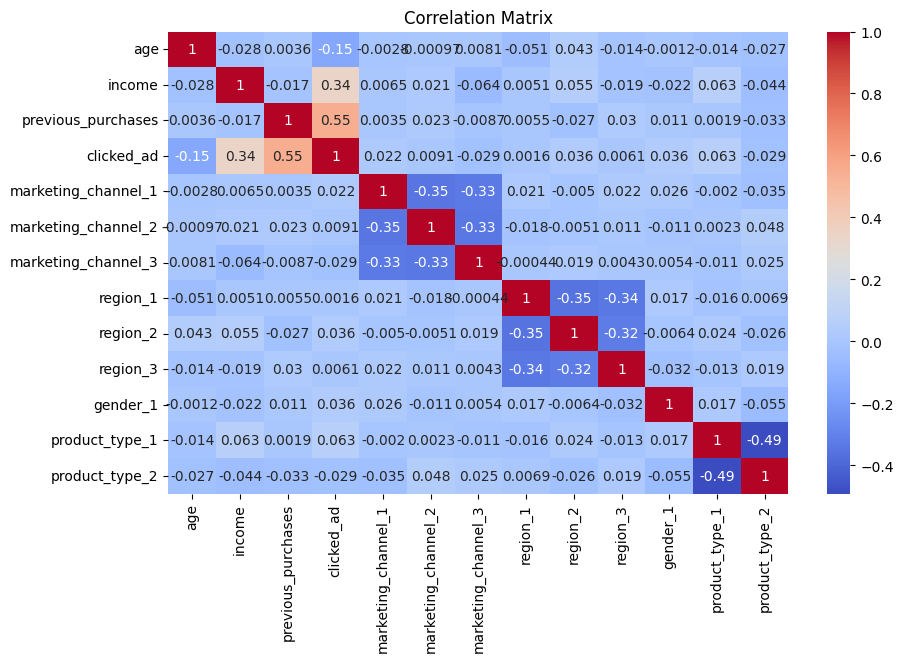

In [15]:
# Data Visualization
# Visualizing the relationship between features and churn
plt.figure(figsize=(10, 6))
sns.heatmap(df_enc.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train contains the sample data you've provided

# Convert the boolean columns to integers (True -> 1, False -> 0)
X_train = X_train.astype(int)

# Add a constant (intercept) to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train_sm).fit()

# Print the summary of the model
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.378275
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             clicked_ad   No. Observations:                 1040
Model:                          Logit   Df Residuals:                     1027
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.4392
Time:                        11:04:44   Log-Likelihood:                -393.41
converged:                       True   LL-Null:                       -701.52
Covariance Type:            nonrobust   LLR p-value:                3.617e-124
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.9082      0.631    -10.948      0.000      -8.145      -5.671
ag

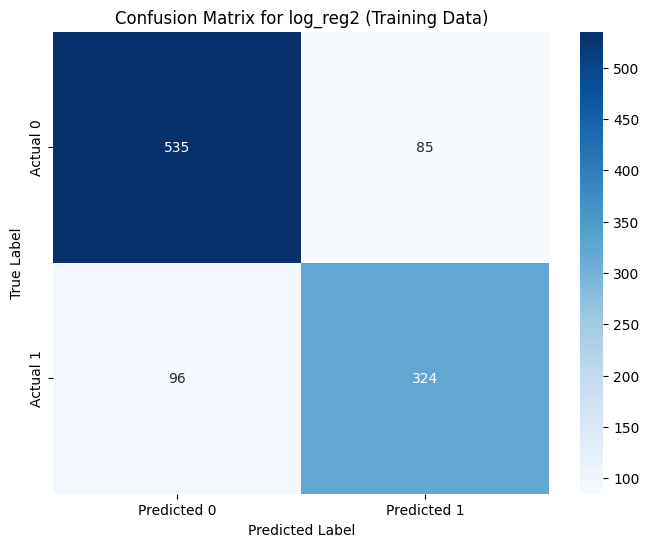

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the target variable for the training data using log_reg2
y_pred_train = log_reg.predict(X_train_sm)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred_train_class = (y_pred_train > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_class)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for log_reg2 (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Optimal Threshold: 0.45
Optimal Accuracy: 0.8337


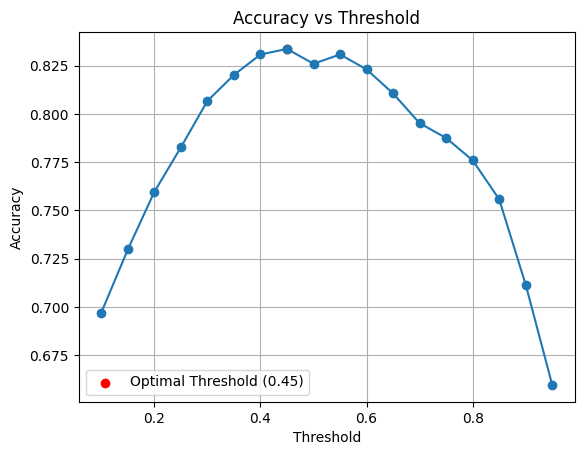

In [18]:
from sklearn.metrics import accuracy_score

# Predict probabilities for the training data
y_pred_prob = log_reg.predict(X_train_sm)

# Test different thresholds
thresholds = np.arange(0.1, 1, 0.05)
accuracy_scores = []

for threshold in thresholds:
    y_pred_class = (y_pred_prob > threshold).astype(int)
    accuracy = accuracy_score(y_train, y_pred_class)
    accuracy_scores.append(accuracy)

# Find the optimal threshold that maximizes accuracy
optimal_threshold = thresholds[np.argmax(accuracy_scores)]
optimal_accuracy = np.max(accuracy_scores)

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Optimal Accuracy: {optimal_accuracy:.4f}")


# Plot accuracy vs threshold
plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Threshold")
plt.scatter(optimal_threshold, optimal_accuracy, color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.legend()
plt.grid(True)
plt.show()

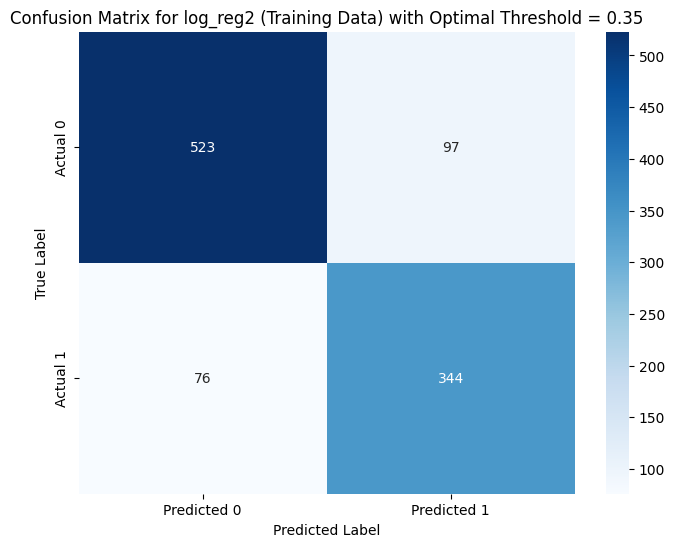

In [19]:
# Predict probabilities for the training data using the optimal threshold (0.45)
y_pred_prob = log_reg.predict(X_train_sm)
y_pred_class = (y_pred_prob > 0.45).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_class)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for log_reg2 (Training Data) with Optimal Threshold = 0.35')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict probabilities for the training data using the optimal threshold (0.32)
y_pred_prob = log_reg.predict(X_train_sm)
y_pred_class = (y_pred_prob > 0.45).astype(int)

# Calculate the model parameters
accuracy = accuracy_score(y_train, y_pred_class)
recall = recall_score(y_train, y_pred_class)
precision = precision_score(y_train, y_pred_class)
f1 = f1_score(y_train, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8337
Recall: 0.8190
Precision: 0.7800
F1 Score: 0.7991


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=24)

# Fit the model to the training data (using the selected features)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

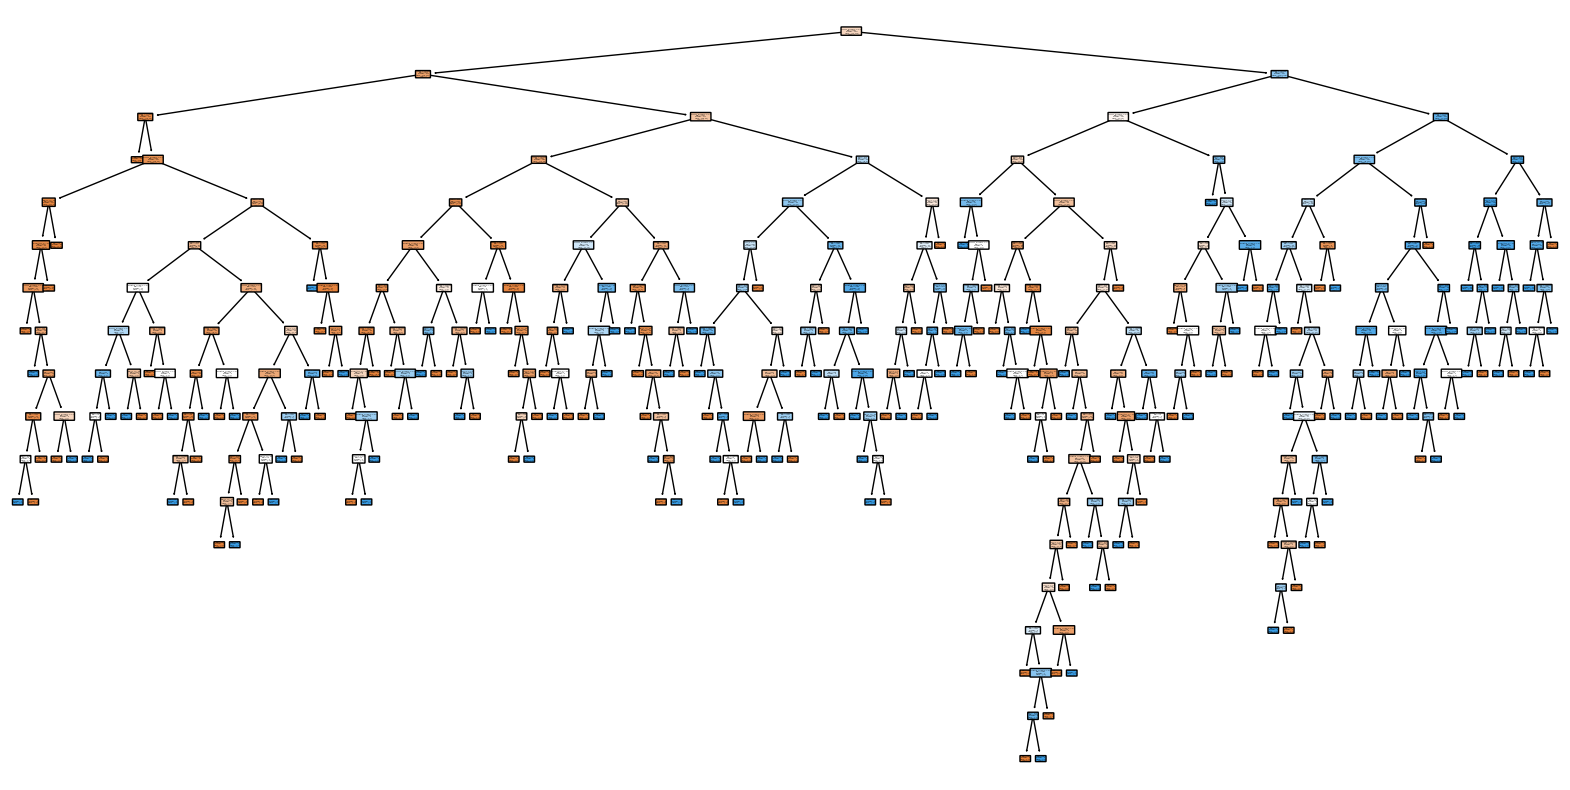

In [23]:
# prompt: display the tree diagram of the cart model

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

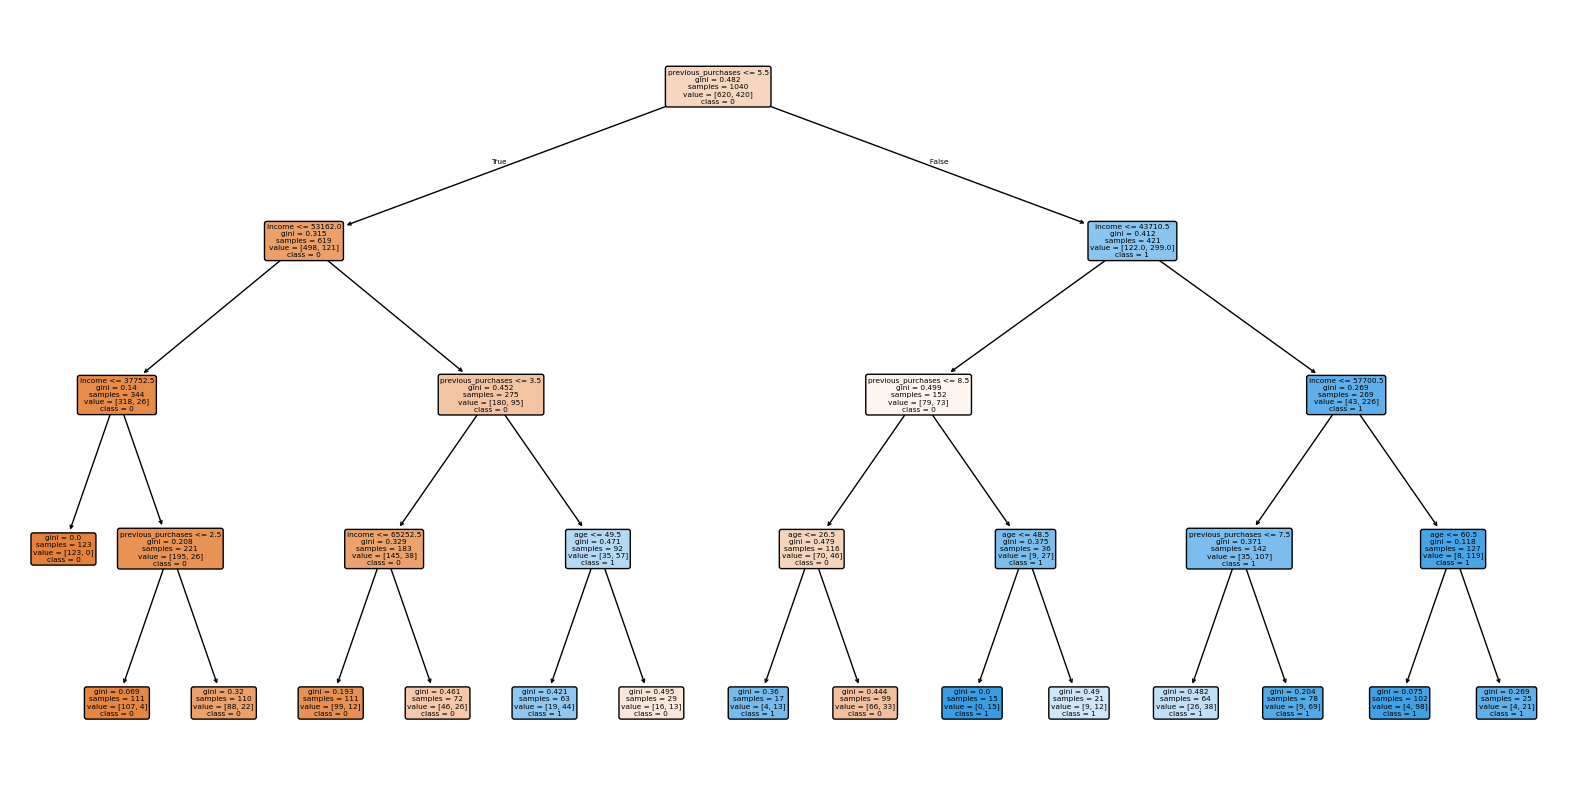

In [24]:
# prompt: prune the tree for 4 levels

# Initialize the CART model with max_depth=4
cart_model = DecisionTreeClassifier(max_depth=4, random_state=24)

# Fit the model to the training data
cart_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

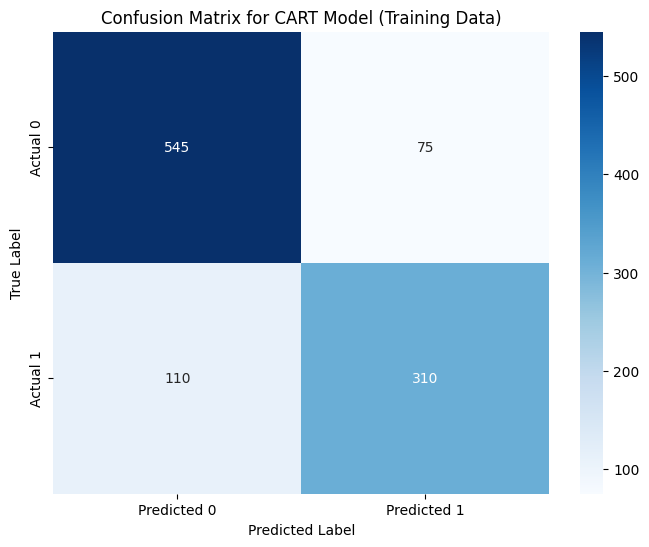

CART Model Performance (Training Data):
Accuracy: 0.8221
Precision: 0.8052
Recall: 0.7381
F1 Score: 0.7702


In [25]:
# Predict on the training data
y_pred_cart = cart_model.predict(X_train)

# Create the confusion matrix
cm_cart = confusion_matrix(y_train, y_pred_cart)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CART Model (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate evaluation metrics
accuracy_cart = accuracy_score(y_train, y_pred_cart)
precision_cart = precision_score(y_train, y_pred_cart)
recall_cart = recall_score(y_train, y_pred_cart)
f1_cart = f1_score(y_train, y_pred_cart)

print(f"CART Model Performance (Training Data):")
print(f"Accuracy: {accuracy_cart:.4f}")
print(f"Precision: {precision_cart:.4f}")
print(f"Recall: {recall_cart:.4f}")
print(f"F1 Score: {f1_cart:.4f}")

1. Based on the finding , customer group which have higher income and have made previous purchases are more likely to engage with the advertisement ads (age factor doesn't play a huge role here)

Brandify can improve there segmentation strategy tho focusing on advertisement that are inclinced to the products that have been previous brought the most last week and keep changing the advertisement priortity each week based on what product had the most pruchases recently , trust promoting latest product in trend which maximixes engagement.

2. clothing type products has the highest engagement , so promotion ads Based on the clothing product should slightly be more preferred and overall the other two product type engagement are not too far behind clothing , so create ads for all 3 , the number of purchases for all 3 is almost close , so if you want to priotize profit , go for more advertisement of electronics product , if you want to priotize growing your custemer base and creating more engagement , go for clothing advertisement priority


3. logisthic regression model will be preferred since not only it has higher accuracy but higher recall rate too then the cart model , hence more customers who are engaging with advertisement are indentified , so more accurate picture of who are engaging with advertsement is created.

4. From the ctr chart below its clear that product type 1 - clothing , mainly is preforming best tho channel 0 and 1 , so focus on these two channels - email and google ads for getting engagement for clothing product

similarly for other two product types tho ctr chart find the best channels to engage with customers tho higher percentage displayed in chart , focus on those app channels for that poarticular product type

5. To effectively implement the model insights, Priya should take the following steps:

1.  Detailed Report and Presentation:
#     * Create a comprehensive report summarizing the key findings, including visualizations of important patterns and relationships.
#     * Present these findings to the marketing team in a clear, concise, and engaging way, emphasizing actionable insights.
#     * Use visuals to communicate the insights, including charts, graphs, and other illustrations to aid the understanding.

 2.  Collaborative Workshops:
#     * Conduct workshops involving both the analytics and marketing teams to discuss the model's implications.
#     * Facilitate open discussions to ensure that the marketing team understands the rationale behind the suggested strategies.
#     * Encourage questions and feedback to bridge any knowledge gaps and ensure alignment.


 3.  A/B Testing and Experimentation:
#     * Implement the suggested changes gradually, starting with A/B testing to compare the performance of the new strategies against the old ones.
#     * This step provides empirical evidence for the effectiveness of the proposed changes, allowing adjustments as needed.
#     * Use statistical significance tests to validate the impact of the changes on key performance indicators.

 4.  Define Key Performance Indicators (KPIs):
#     * Collaboratively define clear KPIs to measure the success of implemented strategies.  These could include CTR, conversion rate, customer lifetime value, and other relevant metrics.
#     * The KPIs should directly align with the business goals, enabling an accurate assessment of performance.
#     * Regularly track and monitor KPIs to understand whether the strategies are effective and to make necessary adjustments.

 5.  Feedback Loop and Iteration:
#     * Establish a feedback loop between the analytics and marketing teams to continuously evaluate the performance of the implemented strategies.
#     * Regularly review the KPIs, gather feedback from the marketing team, and refine the model or strategies as needed.
#     * Continuous monitoring helps adapt to changing market dynamics and customer behavior.

 Prioritize Actions:
     * Base decisions on the magnitude and significance of the insights. Start with changes most likely to have a positive impact and progressively introduce more complex ones.

 Example:
 Based on the analysis showing higher engagement from higher-income customers who have made previous purchases, prioritize campaigns targeting this segment with personalized offers.
 Measure the ROI of these campaigns and iteratively adjust them based on the observed performance.


Click-through rates per product type:
 product_type
0    0.376726
1    0.442886
2    0.379167
Name: clicked_ad, dtype: float64


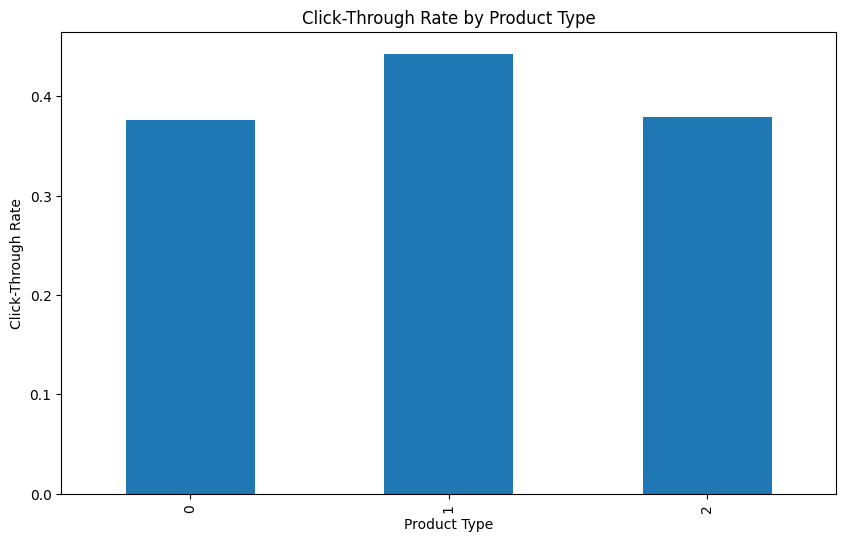

In [28]:



# Calculate the click-through rate (CTR) for different product types.
product_ctr = df.groupby('product_type')['clicked_ad'].mean()
print("Click-through rates per product type:\n", product_ctr)


# Visualize CTR across different product types
plt.figure(figsize=(10, 6))
product_ctr.plot(kind='bar')
plt.title('Click-Through Rate by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Click-Through Rate')
plt.show()





In [30]:
# prompt: which product type has more previous purchases , rank all 3

# Calculate the number of previous purchases for each product type.
product_purchases = df.groupby('product_type')['previous_purchases'].sum()

# Sort product types by the number of previous purchases in descending order.
ranked_products = product_purchases.sort_values(ascending=False)

# Print the ranked product types.
print("Product types ranked by the number of previous purchases:\n", ranked_products)

Product types ranked by the number of previous purchases:
 product_type
0    2357
1    2263
2    2108
Name: previous_purchases, dtype: int64


    product_type  marketing_channel       CTR
1              0                  1  0.411348
0              0                  0  0.381679
3              0                  3  0.355932
2              0                  2  0.350427
4              1                  0  0.483871
6              1                  2  0.442748
7              1                  3  0.427350
5              1                  1  0.417323
9              2                  1  0.428571
10             2                  2  0.421429
11             2                  3  0.341463
8              2                  0  0.314286


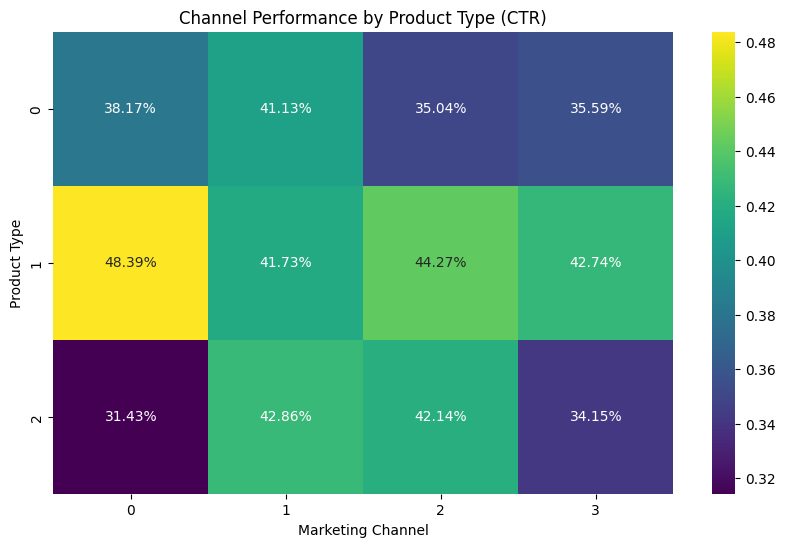

In [32]:
# prompt: which channel performs best for which product type based on clicked ads

# Group by product type and marketing channel, then calculate the mean of 'clicked_ad'
channel_performance = df.groupby(['product_type', 'marketing_channel'])['clicked_ad'].mean().reset_index()

# Rename the 'clicked_ad' column to 'CTR' (Click-Through Rate)
channel_performance = channel_performance.rename(columns={'clicked_ad': 'CTR'})

# Sort the DataFrame by product type and CTR in descending order
channel_performance = channel_performance.sort_values(['product_type', 'CTR'], ascending=[True, False])

# Print the resulting DataFrame
print(channel_performance)

# Create a pivot table to visualize the results
pivot_table = channel_performance.pivot(index='product_type', columns='marketing_channel', values='CTR')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2%")
plt.title('Channel Performance by Product Type (CTR)')
plt.xlabel('Marketing Channel')
plt.ylabel('Product Type')
plt.show()